Este notebook é parte da aula para a disciplina AGA0513
(nina hirata, 2020)

## Logistic Regression
- Introdução
- Otimização da função custo usando *gradiente descent*
- Criação de dados artificiais para serem usados nos exemplos
- Solução usando scikit-learn

## Introdução

Regressão logística é um dos modelos básicos de classificação linear binária. A formulação usada aqui assume que $y \in \{-1,+1\}$, conforme descrito por exemplo no livro de Yaser S. Abu-Mostafa, Malik Magdon-Ismail, and Hsuan-Tien Lin, *Learning from Data*, 2012. (Quando 
assumimos $y \in \{0,1\}$, a função custo é expressa de outra forma, porém as idéias usadas são as mesmas e as soluções são equivalentes).

A função de custo a ser minimzada é dada por
$$
J(\mathbf{w}) = \frac{1}{N} \sum_{i=1}^{N} \ln(1 + e^{-y^{(i)} \mathbf{w}^T \mathbf{x}^{(i)}}) \tag{1}
$$

O seu gradiente é dado por:

$$\nabla J(\mathbf{w}) = - \frac{1}{N}\sum_{i=1}^{N} \frac{y^{(i)} \mathbf{x}^{(i)}}{1 + e^{y^{(i)} \mathbf{w}^T \mathbf{x}^{(i)}}}  \tag{2}$$

O parâmetro $\mathbf{w}$ é determinado aplicando-se o algoritmo do gradiente descendente.


#### Cross-entropy loss and cross-entropy gradient
Implementação das equações (1) e (2), na forma matricial

In [0]:
import numpy as np

# equação (1)
def cross_entropy(w, X, y): 
    return np.mean(np.log(1 + np.exp(-y * np.dot(X, w))))

# equação (2)
def cross_entropy_gradient(w, X, y):    
    N = X.shape[0]
    return -np.dot(X.transpose(), y / (1 + np.exp(y * np.dot(X, w)))) / N

### Treinamento

O treinamento tem como entradas a matriz de dados <tt>X (shape = (N, d))</tt> e o vetor <tt>y (shape = (N,))</tt>, e devolve o vetor de pesos <tt>w (shape=(d+1,)</tt> e, opcionalmente, quando o parâmetro  <tt>return_history = True</tt>, o histórico da evolução da função custo.

In [0]:
def train_logistic(X, y, learning_rate = 1e-1, w0 = None,\
                        num_iterations = 1000, return_history = False):

    # Add a bias value 1 as the first coordinate of each example
    X = np.concatenate([np.ones((len(X), 1)), X], axis = 1)
    
    # Initialize the weight vector with random values
    # Here, drawn indenpendently from a normal unit distribution
    if w0 is None:
        w0 = np.random.normal(loc = 0, scale = 1, size = X.shape[1])
    w = w0
    
    # To store the cross entropy value at each iteration
    history = []
    
    for it in range(num_iterations):
        # Append the current iteration's loss
        history.append(cross_entropy(w, X, y))
        
        # ...and apply the grandient step
        w -= learning_rate * cross_entropy_gradient(w, X, y)
        
    history.append(cross_entropy(w, X, y))
    
    if return_history:
        return w, history
    else:
        return w
 

### Predição

Uma vez estimado o vetor de pesos $\mathbf{w}$, basta calcular $\theta(\mathbf{w}^T\mathbf{x})$.

A função logística (sigmoide) é dada por:
$$\theta(z) = \frac{1}{1 + e^{-z}}  \tag{3}$$

A seguir está a função, processando dados na forma matricial.

In [0]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def predict_logistic(X, w):
    # Make sure the data matrix has a bias coordinate
    if X.shape[1] != w.shape[0]:
        # Add a bias value 1 as the first coordinate of each vector
        X = np.concatenate([np.ones((len(X), 1)), X], axis = 1)
    return sigmoid(np.dot(X, w))

## Dataset

Usaremos um *dataset* artificialmente gerado. Vamos gerar dois clusters de pontos, com alguma sobreposição.

In [0]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


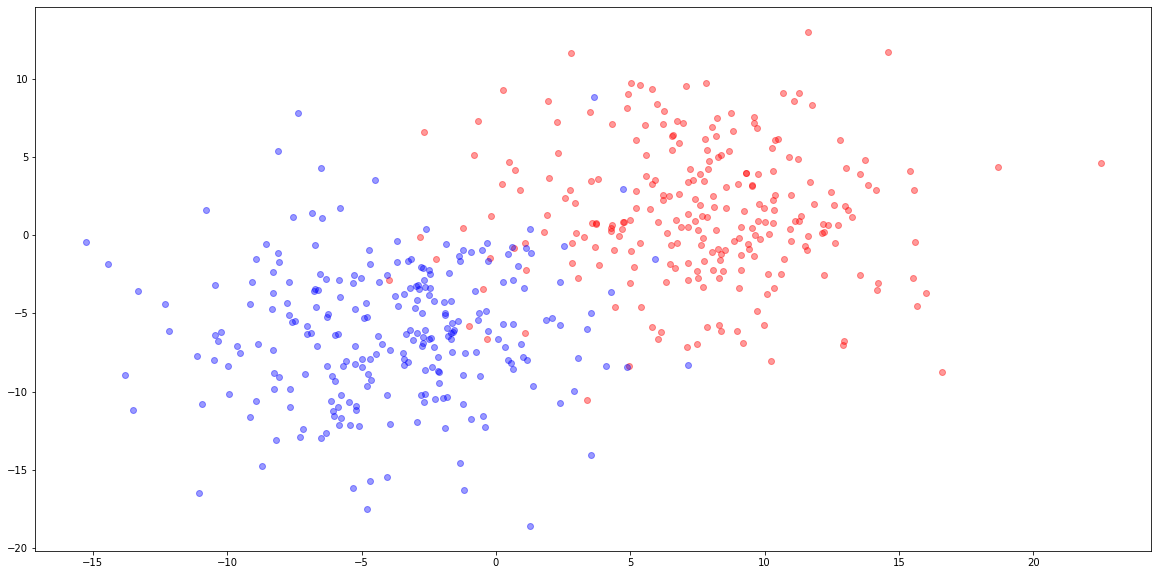

In [5]:
X, y = make_blobs(n_samples=500, n_features=2, cluster_std=4, centers=2, random_state=25)
y[y == 0] = -1.0

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.scatter(X[y==-1,0], \
            X[y==-1,1], \
            label='Class=Neg', c = 'red', alpha = 0.4)

# and positives in blue
ax.scatter(x=X[y==1,0], \
           y=X[y==1,1], \
           label='Class=Pos', c = 'blue', alpha = 0.4)
plt.plot()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=25)

### Divisão em treinamento e teste

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, \
                        test_size=0.2, stratify=y, random_state=25)
print("Treinamento: input", X_train.shape, ", output", y_train.shape)
print("Teste: input", X_test.shape, ", output", y_test.shape)


Treinamento: input (400, 2) , output (400,)
Teste: input (100, 2) , output (100,)


### Treinamento

Final weight:
 [ 0.27266039 -0.60016379 -0.29741007]
Final loss:
 0.14660392878804768


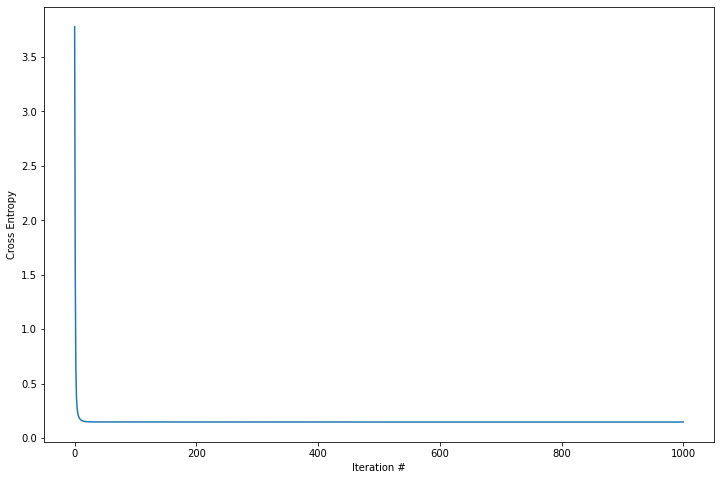

In [7]:
np.random.seed(56789)
w_logistic, loss = train_logistic(X_train, y_train,\
                                  learning_rate = 0.1,
                                  num_iterations = 1000,\
                                  return_history = True)

print("Final weight:\n", w_logistic)
print("Final loss:\n", loss[-1])

plt.figure(figsize = (12, 8))
plt.plot(loss)
plt.xlabel('Iteration #')
plt.ylabel('Cross Entropy')
plt.show()

### Visualização do score e da fronteira de decisão

#### Conjunto de treinamento

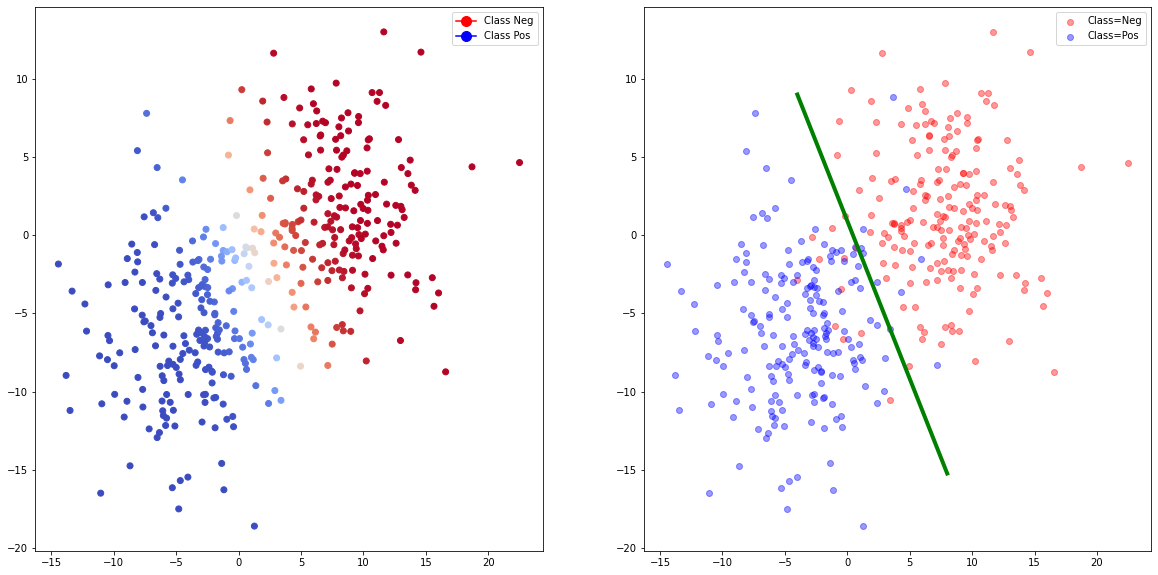

In [8]:
from matplotlib.lines import Line2D

y_pred = predict_logistic(X_train, w_logistic)

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax1.scatter(x = X_train[:,0], y = X_train[:,1],\
            c = -y_pred, cmap = 'coolwarm')
legend_elements = [Line2D([0], [0], marker='o', color='r',\
                    label='Class Neg', markerfacecolor='r',\
                    markersize=10),\
Line2D([0], [0], marker='o', color='b',\
                    label='Class Pos', markerfacecolor='b',\
                    markersize=10)]
ax1.legend(handles=legend_elements, loc='best')
      
ax2 = fig.add_subplot(122)
ax2.scatter(X_train[y_train==-1,0], \
            X_train[y_train==-1,1], \
            label='Class=Neg', c = 'red', alpha = 0.4)

# and positives in blue
ax2.scatter(x=X_train[y_train==1,0], \
           y=X_train[y_train==1,1], \
           label='Class=Pos', c = 'blue', alpha = 0.4)

ax2.legend(loc='best')
    
p1 = (-4, -(w_logistic[0] -4*w_logistic[1])/w_logistic[2])
p2 = (8,  -(w_logistic[0] +8*w_logistic[1])/w_logistic[2])

lines = ax2.plot([p1[0], p2[0]], [p1[1], p2[1]], '-')
plt.setp(lines, color='g', linewidth=4.0)

plt.show()

#### Conjunto de teste

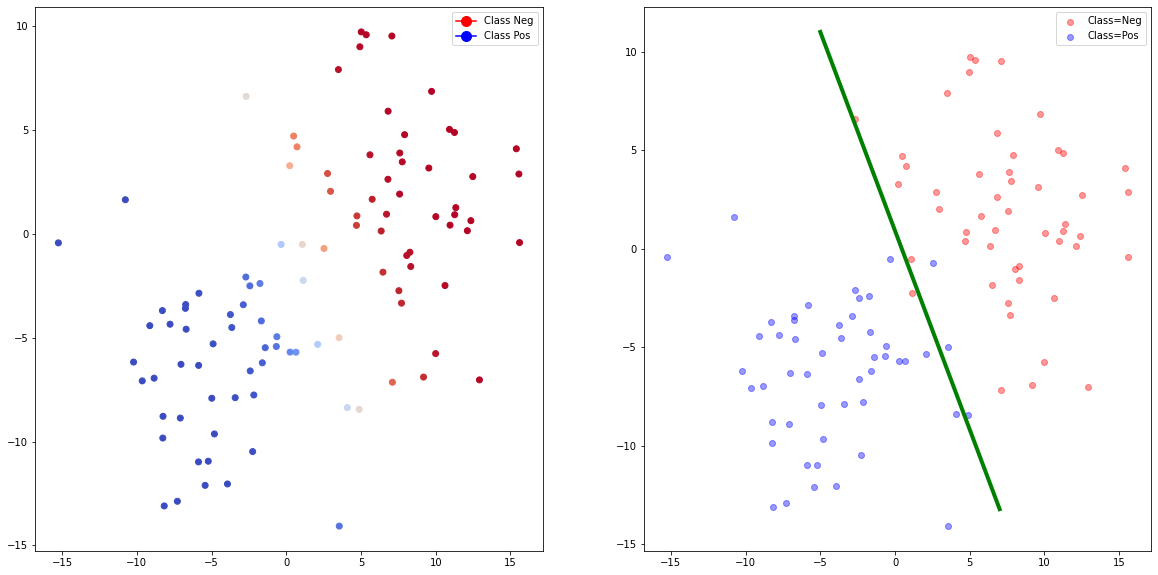

In [9]:
y_pred = predict_logistic(X_test, w_logistic)

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax1.scatter(x = X_test[:,0], y = X_test[:,1],\
            c = -y_pred, cmap = 'coolwarm')
legend_elements = [Line2D([0], [0], marker='o', color='r',\
                    label='Class Neg', markerfacecolor='r',\
                    markersize=10),\
Line2D([0], [0], marker='o', color='b',\
                    label='Class Pos', markerfacecolor='b',\
                    markersize=10)]
ax1.legend(handles=legend_elements, loc='best')
      
ax2 = fig.add_subplot(122)
ax2.scatter(X_test[y_test==-1,0], \
            X_test[y_test==-1,1], \
            label='Class=Neg', c = 'red', alpha = 0.4)

# and positives in blue
ax2.scatter(x=X_test[y_test==1,0], \
           y=X_test[y_test==1,1], \
           label='Class=Pos', c = 'blue', alpha = 0.4)

ax2.legend(loc='best')
    
p1 = (-5, -(w_logistic[0] -5*w_logistic[1])/w_logistic[2])
p2 = (7,  -(w_logistic[0] +7*w_logistic[1])/w_logistic[2])

lines = ax2.plot([p1[0], p2[0]], [p1[1], p2[1]], '-')
plt.setp(lines, color='g', linewidth=4.0)

plt.show()

### Usando a função do scikit-learn

(100, 2)
[[-0.61004601 -0.36544135]]


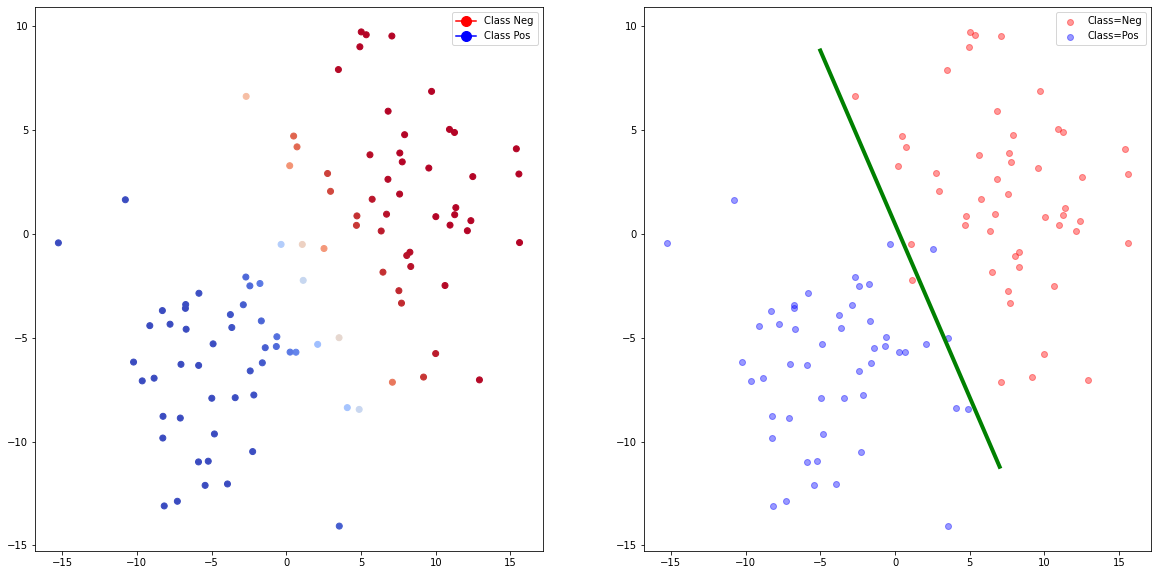

In [10]:
from sklearn.linear_model import LogisticRegression

# treinamento
clf = LogisticRegression(random_state=0,solver='lbfgs').fit(X, y)
#y_pred = clf.predict(X_test)
y_pred = clf.predict_proba(X_test)
print(y_pred.shape)
print(clf.coef_)

# desempenho sobre o conjunto de teste
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax1.scatter(x = X_test[:,0], y = X_test[:,1],\
            c = -y_pred[:,1], cmap = 'coolwarm')
legend_elements = [Line2D([0], [0], marker='o', color='r',\
                    label='Class Neg', markerfacecolor='r',\
                    markersize=10),\
Line2D([0], [0], marker='o', color='b',\
                    label='Class Pos', markerfacecolor='b',\
                    markersize=10)]
ax1.legend(handles=legend_elements, loc='best')
      
ax2 = fig.add_subplot(122)
ax2.scatter(X_test[y_test==-1,0], \
            X_test[y_test==-1,1], \
            label='Class=Neg', c = 'red', alpha = 0.4)

# and positives in blue
ax2.scatter(x=X_test[y_test==1,0], \
           y=X_test[y_test==1,1], \
           label='Class=Pos', c = 'blue', alpha = 0.4)

ax2.legend(loc='best')
    
p1 = (-5, -(clf.intercept_ -5*clf.coef_[0,0])/clf.coef_[0,1])
p2 = (7,  -(clf.intercept_ +7*clf.coef_[0,0])/clf.coef_[0,1])

lines = ax2.plot([p1[0], p2[0]], [p1[1], p2[1]], '-')
plt.setp(lines, color='g', linewidth=4.0)

plt.show()